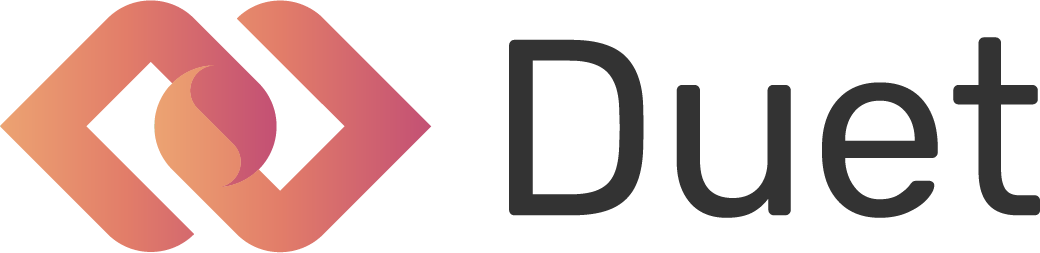

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [1]:
import syft as sy
duet1 = sy.join_duet(loopback=True)

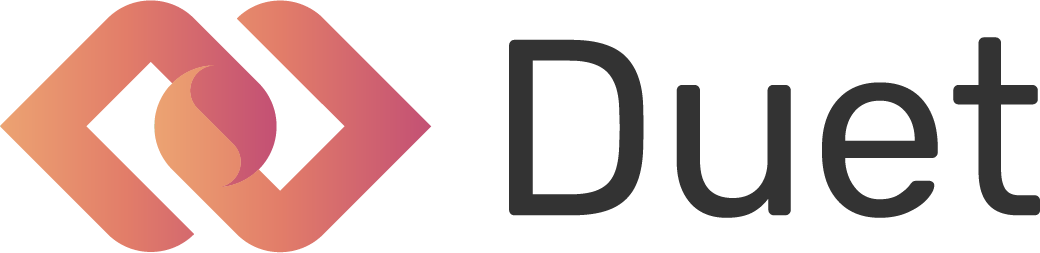

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [2]:
duet2 = sy.join_duet(loopback=True)

In [3]:
duet1.store.pandas

ID       Tags Description  \
0  <UID: 42a13f5e6f8b4037836456a35d818b08>  [dataset]     Split 1   

              object_type  
0  <class 'torch.Tensor'>

In [4]:
duet2.store.pandas

ID       Tags Description  \
0  <UID: 7e227ad980604821ac158c37c0fdefa1>  [dataset]     Split 2   

              object_type  
0  <class 'torch.Tensor'>

In [7]:
import torch
remote_torch1 = duet1.torch
remote_torch2 = duet2.torch

# In order to serialise our model we need to define it as below
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        self.lin = self.torch_ref.nn.Linear(1,1)

    def forward(self, x):
        x = self.lin(x)
        return x
    
model1 = SyNet(torch)
model1_ptr = model1.send(duet1)
opt1 = remote_torch1.optim.SGD(params=model1_ptr.parameters(), lr=0.1)

model2 = SyNet(torch)
model2_ptr = model2.send(duet2)
opt2 = remote_torch1.optim.SGD(params=model2_ptr.parameters(), lr=0.1)



In [12]:
data1_pointer = duet1.store[0]
data2_pointer = duet2.store[0]

In [13]:
model3 = torch.nn.Linear(2,1)
opt3 = torch.optim.SGD(params=model3.parameters(),lr=0.1)

target= torch.tensor([[0],[0],[1],[1.]])

In [14]:
for iter in range(20):
    opt1.zero_grad()
    opt2.zero_grad()
    opt3.zero_grad()
    
    activation1_ptr = model1_ptr(data1_pointer)
    activation1 = activation1_ptr.clone().get(request_block=True)
    
    activation2_ptr = model2_ptr(data2_pointer)
    activation2 = activation2_ptr.clone().get(request_block=True)
    
    activation = torch.cat((activation1, activation2), 1)
    pred = model3(activation)
    
    loss = ((pred - target)**2).sum()
    loss.backward()
    
    grad1_ptr = activation1.grad.clone().send(duet1)
    grad2_ptr = activation2.grad.clone().send(duet2)

    activation1_ptr.backward(grad1_ptr)
    activation2_ptr.backward(grad2_ptr)
    
    opt1.step()
    opt2.step()
    opt3.step()
    
    print(loss)
    

tensor(2.7021, grad_fn=<SumBackward0>)
tensor(1.1893, grad_fn=<SumBackward0>)
tensor(1.0348, grad_fn=<SumBackward0>)
tensor(0.9036, grad_fn=<SumBackward0>)
tensor(0.7809, grad_fn=<SumBackward0>)
tensor(0.6588, grad_fn=<SumBackward0>)
tensor(0.5351, grad_fn=<SumBackward0>)
tensor(0.4130, grad_fn=<SumBackward0>)
tensor(0.2997, grad_fn=<SumBackward0>)
tensor(0.2029, grad_fn=<SumBackward0>)
tensor(0.1278, grad_fn=<SumBackward0>)
tensor(0.0751, grad_fn=<SumBackward0>)
tensor(0.0414, grad_fn=<SumBackward0>)
tensor(0.0218, grad_fn=<SumBackward0>)
tensor(0.0111, grad_fn=<SumBackward0>)
tensor(0.0055, grad_fn=<SumBackward0>)
tensor(0.0028, grad_fn=<SumBackward0>)
tensor(0.0014, grad_fn=<SumBackward0>)
tensor(0.0007, grad_fn=<SumBackward0>)
tensor(0.0004, grad_fn=<SumBackward0>)
